In [1]:
import subprocess
import numpy as np
import pandas as pd

In [3]:
dfUrls = pd.read_csv("urls_to_get.csv")
dfUrls.head()

,urls
0,https://s3.amazonaws.com/tripdata/201901-citib...
1,https://s3.amazonaws.com/tripdata/201902-citib...
2,https://s3.amazonaws.com/tripdata/201903-citib...
3,https://s3.amazonaws.com/tripdata/201904-citib...
4,https://s3.amazonaws.com/tripdata/201905-citib...


In [4]:
for i,row in dfUrls.iterrows():
  print(row['urls'])
  subprocess.run(['wget',row['urls']])
  subprocess.run(['unzip',row['urls'].split("/")[-1]])

https://s3.amazonaws.com/tripdata/201901-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201902-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201903-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201904-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201905-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201906-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201907-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201908-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201909-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201910-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201911-citibike-tripdata.csv.zip
https://s3.amazonaws.com/tripdata/201912-citibike-tripdata.csv.zip


In [5]:
result = subprocess.run(["ls"],capture_output=True,text=True)

In [6]:
import os
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.2'
spark_version = 'spark-3.1.1'
os.environ['SPARK_VERSION']=spark_version
# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark
# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"
# Start a SparkSession
import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [60.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [70]:
df_01 = "201901-citibike-tripdata.csv"
df_02 = "201902-citibike-tripdata.csv"
df_03 = "201903-citibike-tripdata.csv"
df_04 = "201904-citibike-tripdata.csv"
df_05 = "201905-citibike-tripdata.csv"
df_06 = "201906-citibike-tripdata.csv"
df_07 = "201907-citibike-tripdata.csv"
df_08 = "201908-citibike-tripdata.csv"
df_09 = "201909-citibike-tripdata.csv"
df_10 = "201910-citibike-tripdata.csv"
df_11 = "201911-citibike-tripdata.csv"
df_12 = "201912-citibike-tripdata.csv"

In [71]:
csv_list = [df_01,df_02,df_03,df_04,df_05,df_06,df_07,df_08,df_09,df_10,df_11,df_12]
csv_list

['201901-citibike-tripdata.csv',
 '201902-citibike-tripdata.csv',
 '201903-citibike-tripdata.csv',
 '201904-citibike-tripdata.csv',
 '201905-citibike-tripdata.csv',
 '201906-citibike-tripdata.csv',
 '201907-citibike-tripdata.csv',
 '201908-citibike-tripdata.csv',
 '201909-citibike-tripdata.csv',
 '201910-citibike-tripdata.csv',
 '201911-citibike-tripdata.csv',
 '201912-citibike-tripdata.csv']

In [72]:
from pyspark import SparkFiles
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CitiBikeFinal").getOrCreate()
#The odd columns hash is where the column names are not matching with most of the other dataframes
url = f"/content/{csv_list[0]}"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get(csv_list[0]), header=True, inferSchema=True, timestampFormat="yyyy-MM-dd HH:mm:ss:ms")

In [31]:
# df_string.describe().show()

In [75]:
citibikeSchema=df.schema
for csvfile in csv_list[1:]:
    fileloc = f"/content/{csvfile}"
    print("Loading: "+fileloc)   
    spark.sparkContext.addFile(fileloc)
    df2 = spark.read.csv(SparkFiles.get(csvfile), header=True, schema=citibikeSchema)
    # Important!!!
    df = df.union(df2)
    

Loading: /content/201902-citibike-tripdata.csv
Loading: /content/201903-citibike-tripdata.csv
Loading: /content/201904-citibike-tripdata.csv
Loading: /content/201905-citibike-tripdata.csv
Loading: /content/201906-citibike-tripdata.csv
Loading: /content/201907-citibike-tripdata.csv
Loading: /content/201908-citibike-tripdata.csv
Loading: /content/201909-citibike-tripdata.csv
Loading: /content/201910-citibike-tripdata.csv
Loading: /content/201911-citibike-tripdata.csv
Loading: /content/201912-citibike-tripdata.csv


In [30]:
df.printSchema()

In [76]:
df =df.dropna()

In [77]:
df.drop_duplicates().groupBy('usertype').count().show()

+----------+--------+
|  usertype|   count|
+----------+--------+
|Subscriber|17679521|
|  Customer| 2872176|
+----------+--------+



In [128]:
# df_morning= df.filter(df['starttime'] >= '2019-01-01').filter(df['starttime'] >= '03:59:59.0000').show()
# df_morning

In [117]:
# Show the hour for the date column
from pyspark.sql.functions import hour
df.select(hour(df["starttime"]))

DataFrame[hour(starttime): int]

In [116]:
df = df.withColumn("hour", hour(df['starttime']))

In [111]:
df_morning= df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] < '4').show()

+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----+
|tripduration|           starttime|            stoptime|start station id|  start station name|start station latitude|start station longitude|end station id|    end station name|end station latitude|end station longitude|bikeid|  usertype|birth year|gender|hour|
+------------+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+------+----------+----------+------+----+
|         320|2019-01-01 00:01:...|2019-01-01 00:07:...|            3160|Central Park West...|           40.77896784|           -73.97374737|          3283|W 89 St & Columbu...|          40.7882213|         -73.970

In [137]:
morning_count = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] < '4')

In [135]:
morning_count.groupBy(morning_count['usertype']).count().show()

+----------+------+
|  usertype| count|
+----------+------+
|Subscriber|322412|
|  Customer| 74022|
+----------+------+



In [138]:
morning_count_02 = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] >= '4').filter(df['hour'] < '8')

In [198]:
table_02 = morning_count_02.groupBy(morning_count['usertype']).count().show()

+----------+-------+
|  usertype|  count|
+----------+-------+
|Subscriber|1492045|
|  Customer|  69165|
+----------+-------+



In [140]:
afternoon_count = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] >= '8').filter(df['hour'] < '12')

In [149]:
afternoon_count.groupBy(morning_count['usertype']).count().show()

+----------+-------+
|  usertype|  count|
+----------+-------+
|Subscriber|4335299|
|  Customer| 517028|
+----------+-------+



In [143]:
afternoon_count_02 = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] >= '12').filter(df['hour'] < '16')

In [144]:
afternoon_count_02.groupBy(morning_count['usertype']).count().show()

+----------+-------+
|  usertype|  count|
+----------+-------+
|Subscriber|3794533|
|  Customer| 966961|
+----------+-------+



In [145]:
night_count = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] >= '16').filter(df['hour'] < '20')

In [146]:
night_count.groupBy(morning_count['usertype']).count().show()

+----------+-------+
|  usertype|  count|
+----------+-------+
|Subscriber|5742166|
|  Customer| 910988|
+----------+-------+



In [147]:
night_count_02 = df.filter(df['starttime'] >= '2019-01-01').filter(df['hour'] >= '20').filter(df['hour'] < '24')

In [148]:
night_count_02.groupBy(morning_count['usertype']).count().show()

+----------+-------+
|  usertype|  count|
+----------+-------+
|Subscriber|1993066|
|  Customer| 334012|
+----------+-------+



In [118]:
user_count = df.groupBy('usertype').count().show()
user_count

+----------+--------+
|  usertype|   count|
+----------+--------+
|Subscriber|17679521|
|  Customer| 2872176|
+----------+--------+



In [ ]:
df_string.groupBy('usertype').count().show()

+----------+-------+
|  usertype|  count|
+----------+-------+
|Subscriber|1854228|
|  Customer|  80346|
+----------+-------+



In [194]:
from pyspark.sql.functions import avg
pd_df = df.select("usertype","tripduration").groupBy("usertype").agg(avg("tripduration")).toPandas()


In [200]:
morning_df = morning_count_02.groupBy(morning_count['usertype']).count().toPandas()

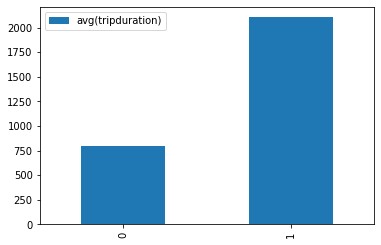

In [195]:
pd_df.plot(kind = 'bar')

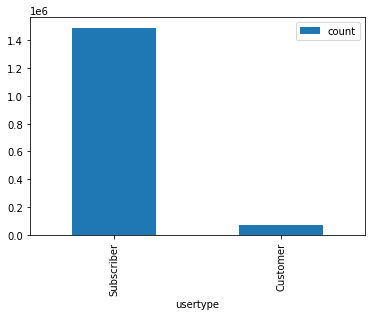

In [203]:
morning_df.plot(kind = 'bar')